In [1]:
%matplotlib inline
from casatasks import tclean, ft, clearcal, uvsub, split
from casatools import ms, table, msmetadata
from spectral_cube import SpectralCube
import numpy as np
from astropy import units as u, visualization
from astropy.visualization import simple_norm
import pylab as pl
visualization.quantity_support()
ms = ms()
msmd = msmetadata()
tb = table()

In [2]:
cd /orange/adamginsburg/ALMA_IMF/2017.1.01355.L/scigoals/W51-E_B3/group.uid___A001_X1296_X106/

/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/science_goal.uid___A001_X1296_X105/group.uid___A001_X1296_X106


In [3]:
ls -d */calibrated/*.split.cal.cont

member.uid___A001_X1296_X107/calibrated/continuum_uid___A002_Xc75eba_X4f72.ms.split.cal.cont/
member.uid___A001_X1296_X107/calibrated/continuum_uid___A002_Xc77d4f_X370b.ms.split.cal.cont/
member.uid___A001_X1296_X107/calibrated/continuum_uid___A002_Xc7cf4e_X57f0.ms.split.cal.cont/
member.uid___A001_X1296_X107/calibrated/continuum_uid___A002_Xc7e4e4_X37e3.ms.split.cal.cont/
member.uid___A001_X1296_X107/calibrated/continuum_uid___A002_Xc8592e_X71c2.ms.split.cal.cont/
member.uid___A001_X1296_X107/calibrated/continuum_uid___A002_Xc8592e_X7966.ms.split.cal.cont/
member.uid___A001_X1296_X109/calibrated/continuum_uid___A002_Xcc626d_Xb34f.ms.split.cal.cont/
member.uid___A001_X1296_X10b/calibrated/continuum_uid___A002_Xc6d2f9_X54b3.ms.split.cal.cont/
member.uid___A001_X1296_X10b/calibrated/continuum_uid___A002_Xc6e968_X4e3b.ms.split.cal.cont/
member.uid___A001_X1296_X10b/calibrated/continuum_uid___A002_Xc7111c_X4b2.ms.split.cal.cont/
member.uid___A001_X1296_X10b/calibrated/continuum_uid___A002_

In [4]:
import glob

In [5]:
calcont = glob.glob("*/calibrated/*.split.cal.cont")

In [6]:
msmd.open("member.uid___A001_X1296_X107/calibrated/uid___A002_Xc75eba_X4f72.ms.split.cal")

True

In [7]:
msmd.fieldnames()

['J1751+0939',
 'J1922+1530',
 'W51-E',
 'W51-E',
 'W51-E',
 'W51-E',
 'W51-E',
 'W51-E',
 'W51-E']

In [8]:
spws = msmd.spwsforfield('W51-E')
for spw in spws:
    print(spw, msmd.meanfreq(spw))

25 93156590980.34784
27 92183337873.34682
29 102581433997.92702
31 104981031165.896


In [9]:
frqs = msmd.chanfreqs(25)

In [10]:
frqs

array([9.32151542e+10, 9.32150932e+10, 9.32150321e+10, ...,
       9.30981498e+10, 9.30980888e+10, 9.30980277e+10])

In [11]:
frqs[np.array([498,592])], frqs[[597,754]], frqs[[763,1019]]

(array([9.31847587e+10, 9.31790214e+10]),
 array([9.31787162e+10, 9.31691337e+10]),
 array([9.31685844e+10, 9.31529594e+10]))

In [12]:
tb.open("member.uid___A001_X1296_X107/calibrated/uid___A002_Xc75eba_X4f72.ms.split.cal")
spwtb = table()
spwtb.open("member.uid___A001_X1296_X107/calibrated/uid___A002_Xc75eba_X4f72.ms.split.cal/SPECTRAL_WINDOW")

True

In [13]:
spw = 25
frq = (spwtb.getcol('CHAN_FREQ', startrow=spw, nrow=1)).squeeze()

In [14]:
ms.open("member.uid___A001_X1296_X107/calibrated/uid___A002_Xc75eba_X4f72.ms.split.cal")
cvfrq = ms.cvelfreqs(spwids=[spw], outframe='LSRK')
ms.close()
cvfrq

array([9.32118151e+10, 9.32117541e+10, 9.32116931e+10, ...,
       9.30948149e+10, 9.30947539e+10, 9.30946929e+10])

In [15]:
fieldnum=3

In [16]:
stb = tb.query(f'ANTENNA1 != ANTENNA2 && FIELD_ID == {fieldnum} && DATA_DESC_ID == {spw}')

In [17]:
dat = stb.getcol('DATA')

In [18]:
avgspec = dat.mean(axis=(0,2))

In [19]:
maxspec = dat.max(axis=(0,2))

In [20]:
frq, cvfrq

(array([9.32151542e+10, 9.32150932e+10, 9.32150321e+10, ...,
        9.30981498e+10, 9.30980888e+10, 9.30980277e+10]),
 array([9.32118151e+10, 9.32117541e+10, 9.32116931e+10, ...,
        9.30948149e+10, 9.30947539e+10, 9.30946929e+10]))

/orange/adamginsburg/miniconda3/envs/casa61_py36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


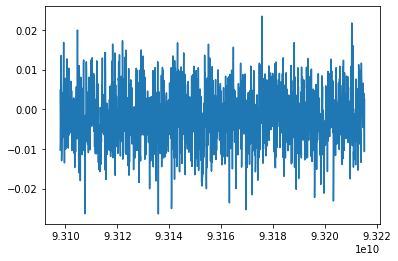

In [21]:
pl.plot(frq, avgspec)

/orange/adamginsburg/miniconda3/envs/casa61_py36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


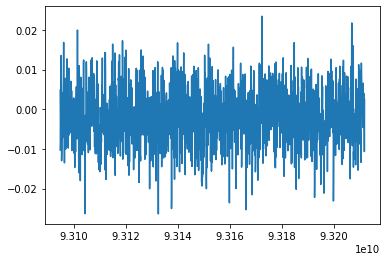

In [22]:
pl.plot(cvfrq, avgspec)

/orange/adamginsburg/miniconda3/envs/casa61_py36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


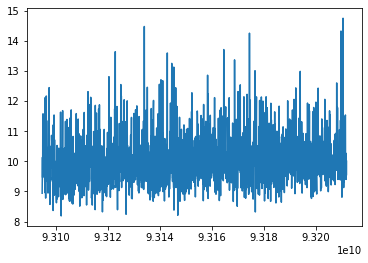

In [23]:
pl.plot(cvfrq, maxspec)

data = ms.getdata(items=['amplitude', 'ifr_number', 'antenna1', 'uvdist', 'axis_info'], ifraxis=True, average=True)